In [74]:
import pandas as pd
import numpy as np

In [75]:
data = pd.read_csv('food_comp_raw.csv')
df = data.drop(['NDB_No','Shrt_Desc'],axis=1)
df = df.dropna(axis=0)
X = df.to_numpy()

u = np.mean(X,axis=0)
std = np.mean(X,axis=0)
d = np.where( np.logical_or(X >= u + 1.8*std ,X <= u + 1.8 *-std))
X = np.delete(X,d[0],axis=0)

data = data.dropna(axis=0).drop(['NDB_No'],axis=1)
indmap = dict()
for i,row in enumerate(data.index):
    indmap[row] = i
data.rename(indmap,axis=0,inplace=True)
data.drop(list(set(d[0])),axis=0,inplace=True)
data.rename({row: i for i,row in enumerate(data.index)},axis=0,inplace=True)
data.to_csv('food_comp_processed.csv')

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


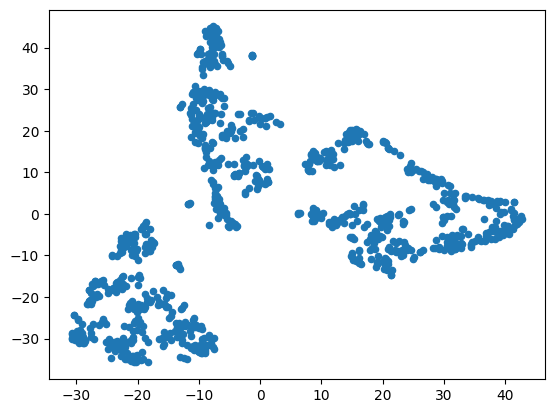

In [76]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE

d = pairwise_distances(X / np.max(X))
Y = TSNE(perplexity=30,init='pca',learning_rate='auto').fit_transform(d)

import pylab 
pylab.scatter(Y[:,0],Y[:,1],20)
pylab.show()

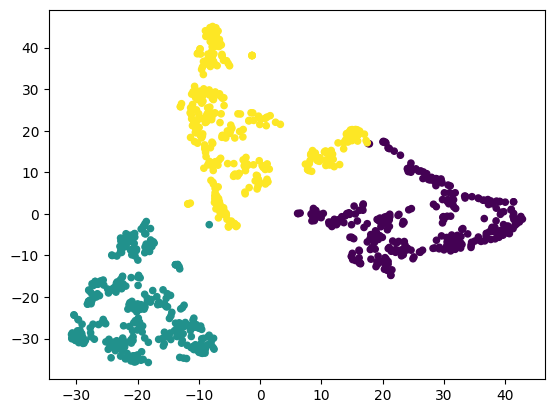

In [77]:
from sklearn.cluster import KMeans
C = KMeans(n_clusters=3).fit_predict(Y) #TSNE projection 
#C = KMeans(n_clusters=3).fit_predict(X / np.max(X)) #High dimensional space

pylab.scatter(Y[:,0],Y[:,1],20,C)

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


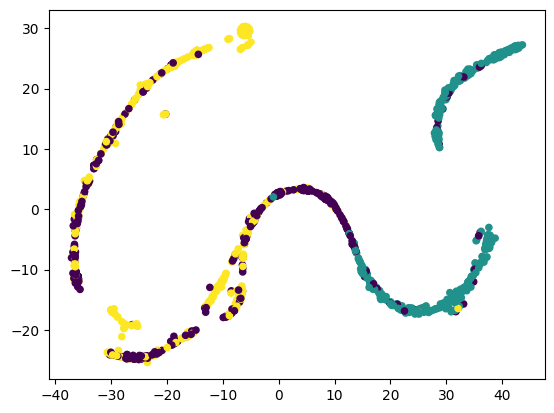

In [78]:
subspace = data[['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)','Vit_D_µg']]
X = subspace.to_numpy()

d = pairwise_distances(X / np.max(X))
Y = TSNE(perplexity=30, init='pca', learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()

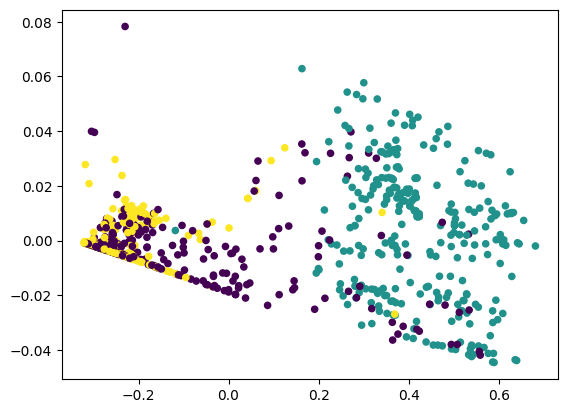

In [79]:
from sklearn.decomposition import PCA

Y = PCA(n_components=2).fit_transform(X/np.max(X))

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


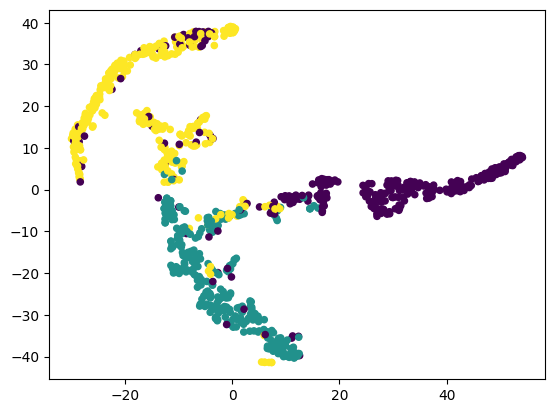

In [81]:
subspace = data[['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)',
                'Vit_D_µg','Water_(g)','Vit_E_(mg)','Sodium_(mg)',
                'Lipid_Tot_(g)','Energ_Kcal']]
X = subspace.to_numpy()

d = pairwise_distances(X / np.max(X))
Y = TSNE(perplexity=30, init='pca', learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()


/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


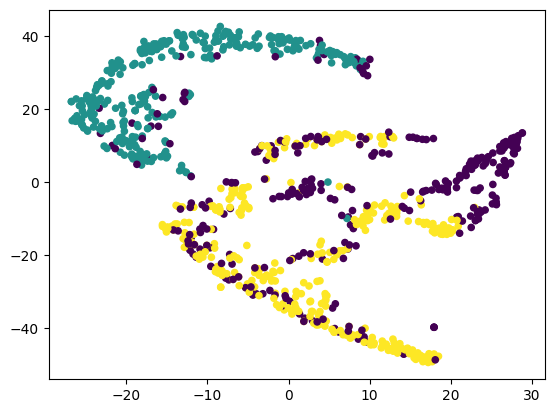

In [85]:
subspace = data.drop(['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)',
                'Vit_D_µg','Water_(g)','Vit_E_(mg)','Sodium_(mg)',
                'Lipid_Tot_(g)','Energ_Kcal','Shrt_Desc'],axis=1)
X = subspace.to_numpy()[:,1:]

d = pairwise_distances(X / np.max(X))
Y = TSNE(perplexity=30, init='pca', learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()


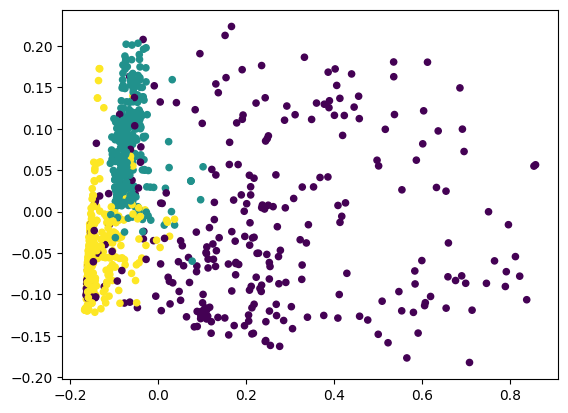

In [82]:
Y = PCA(n_components=2).fit_transform(X/np.max(X))

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()

'[0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2\n 2 0 2 2 2 0 2 2 2 0 0 2 0 2 2 2 0 2 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 0 2 0\n 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0\n 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2\n 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2\n 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2\n 0 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0\n 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 2 2 2 2 0 2 2 2 2\n 2 0 0 0 0 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2\n 2 2 0 2 2 2 0 0 2 2 2 0 0 0 2 0 2 2 2 2 2 0 0 0 0 0 0 2 2 2 2 0 2 2 2 2 2\n 0 0 0 2 0 

(948, 36)
(948, 9)
len 1
len 1


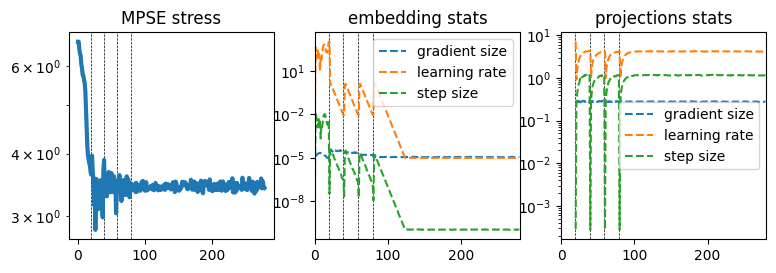

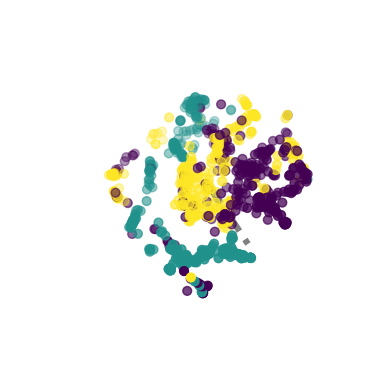

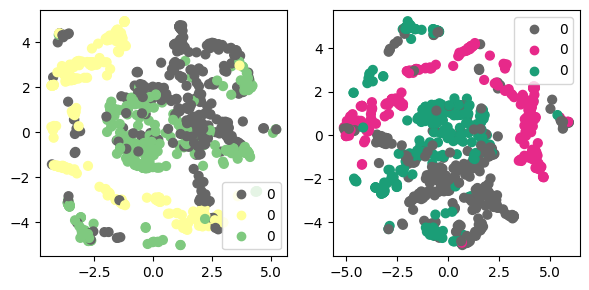

In [87]:
import mview 

x1 = data.drop(['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)',
                'Vit_D_µg','Water_(g)','Vit_E_(mg)','Sodium_(mg)',
                'Lipid_Tot_(g)','Energ_Kcal','Shrt_Desc'],axis=1).to_numpy()[:,1:]
x2 = data[['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)',
                'Vit_D_µg','Water_(g)','Vit_E_(mg)','Sodium_(mg)',
                'Lipid_Tot_(g)','Energ_Kcal']].to_numpy()
x1 /= x1.max(axis=0)
x2 /= x2.max(axis=0)

mview.mpse_tsne([x1,x2],perplexity=30,
                    iters=200,sample_colors=[C,C], sample_classes=[C,C],show_plots=True)

In [7]:
import graph_tool.all as gt 
import numpy as np

G1 = gt.load_graph('small_cluster.dot')
G2 = gt.load_graph('small_cluster2.dot')

d1 = np.array([v for v in gt.shortest_distance(G1)])
d2 = np.array([v for v in gt.shortest_distance(G2)])



(10, 10)
(10, 10)
len 1
len 1


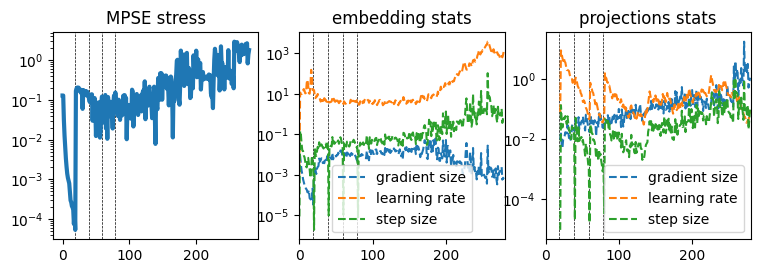

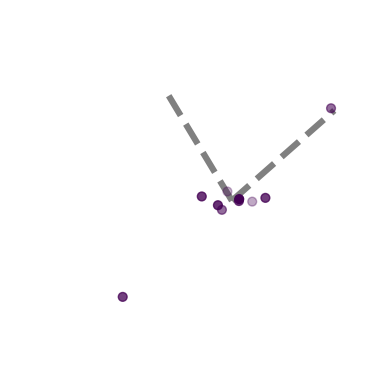

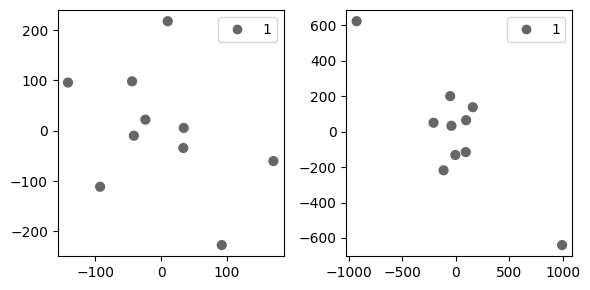

In [12]:
import mview

C = [1 for i in range(G1.num_vertices())]
edge1 = np.array([(e1,e2) for e1,e2 in G1.edges()])
edge2 = np.array([(e1,e2) for e1,e2 in G2.edges()])

mview.mpse_tsne([d1,d2],perplexity=10,show_plots=True,sample_classes=[C,C],sample_colors=[C,C])